In [2]:
import requests

In [3]:
import pandas as pd

In [4]:
from datetime import datetime

In [5]:
page = requests.get("https://en.wikipedia.org/wiki/List_of_presidents_of_the_United_States")

In [6]:
page.status_code

200

In [7]:
from bs4 import BeautifulSoup 

In [8]:
soup = BeautifulSoup(page.content, 'html.parser')

In [9]:
print(soup.prettify()) #displaying the parsed page

<!DOCTYPE html>
<html class="client-nojs vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-width-content-enabled vector-feature-custom-font-size-clientpref-0 vector-feature-appearance-disabled vector-feature-appearance-pinned-clientpref-0 vector-feature-night-mode-disabled skin-theme-clientpref-day vector-toc-available" dir="ltr" lang="en">
 <head>
  <meta charset="utf-8"/>
  <title>
   List of presidents of the United States - Wikipedia
  </title>
  <script>
   (function(){var className="client-js vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-featu

In [10]:
president_info = soup.find(id = "mw-content-text" )
president_info

<div class="mw-body-content" id="mw-content-text"><div class="mw-content-ltr mw-parser-output" dir="ltr" lang="en"><p class="mw-empty-elt">
</p>
<style data-mw-deduplicate="TemplateStyles:r1033289096">.mw-parser-output .hatnote{font-style:italic}.mw-parser-output div.hatnote{padding-left:1.6em;margin-bottom:0.5em}.mw-parser-output .hatnote i{font-style:normal}.mw-parser-output .hatnote+link+.hatnote{margin-top:-0.5em}</style><div class="hatnote navigation-not-searchable" role="note">"Presidents of the United States" redirects here. For other uses, see <a class="mw-disambig" href="/wiki/President_of_the_United_States_(disambiguation)" title="President of the United States (disambiguation)">President of the United States (disambiguation)</a>.</div>
<figure typeof="mw:File/Thumb"><a class="mw-file-description" href="/wiki/File:White_House_Washington.JPG"><img class="mw-file-element" data-file-height="2440" data-file-width="4163" decoding="async" height="188" src="//upload.wikimedia.org/wi

In [11]:
table = soup.find("table",{"class":"wikitable"})

In [17]:
print(table.prettify())

<table class="wikitable sortable sticky-header" style="text-align:center;">
 <caption>
  <style data-mw-deduplicate="TemplateStyles:r1152813436">
   .mw-parser-output .sr-only{border:0;clip:rect(0,0,0,0);clip-path:polygon(0px 0px,0px 0px,0px 0px);height:1px;margin:-1px;overflow:hidden;padding:0;position:absolute;width:1px;white-space:nowrap}
  </style>
  <span class="sr-only">
   List of presidents of the United States from 1789 – till date.
  </span>
 </caption>
 <tbody>
  <tr>
   <th scope="col">
    <abbr title="Number">
     No.
    </abbr>
    <sup class="reference" id="cite_ref-14">
     <a href="#cite_note-14">
      [a]
     </a>
    </sup>
   </th>
   <th class="unsortable" scope="col">
    Portrait
   </th>
   <th scope="col">
    Name
    <br/>
    <span style="font-size:85%;">
     (Birth–Death)
    </span>
   </th>
   <th class="unsortable" scope="col">
    Term
    <sup class="reference" id="cite_ref-FOOTNOTELOCwhitehouse.gov_15-0">
     <a href="#cite_note-FOOTNOTELOCwhi

In [12]:
names = [] 
for row in table.find_all("tr")[1:]: #skipped the header 
    cell = row.find_all("td") #iterates across the row 

    name_col = cell[1].get_text(strip=True) #cell 1 has the names 
    names.append(name_col)

In [49]:
names

['George Washington(1732–1799)[17]',
 'John Adams(1735–1826)[19]',
 'Thomas Jefferson(1743–1826)[21]',
 'James Madison(1751–1836)[22]',
 'James Monroe(1758–1831)[24]',
 'John Quincy Adams(1767–1848)[25]',
 'Andrew Jackson(1767–1845)[28]',
 'Martin Van Buren(1782–1862)[29]',
 'William Henry Harrison(1773–1841)[30]',
 'John Tyler(1790–1862)[31]',
 'James K. Polk(1795–1849)[34]',
 'Zachary Taylor(1784–1850)[35]',
 'Millard Fillmore(1800–1874)[36]',
 'Franklin Pierce(1804–1869)[38]',
 'James Buchanan(1791–1868)[39]',
 'Abraham Lincoln(1809–1865)[40]',
 'Andrew Johnson(1808–1875)[42]',
 'Ulysses S. Grant(1822–1885)[43]',
 'Rutherford B. Hayes(1822–1893)[44]',
 'James A. Garfield(1831–1881)[45]',
 'Chester A. Arthur(1829–1886)[46]',
 'Grover Cleveland(1837–1908)[48]',
 'Benjamin Harrison(1833–1901)[49]',
 'Grover Cleveland(1837–1908)[48]',
 'William McKinley(1843–1901)[50]',
 'Theodore Roosevelt(1858–1919)[51]',
 'William Howard Taft(1857–1930)[53]',
 'Woodrow Wilson(1856–1924)[54]',
 'Warre

In [13]:
term = [] 
for row in table.find_all("tr")[1:]: #skipped the header 
    cell = row.find_all("td") #iterates across the row 

    term_col = cell[2].get_text(strip=True) #cell 2 has the terms
    term.append(term_col)

In [14]:
term

['April 30, 1789–March 4, 1797',
 'March 4, 1797–March 4, 1801',
 'March 4, 1801–March 4, 1809',
 'March 4, 1809–March 4, 1817',
 'March 4, 1817–March 4, 1825',
 'March 4, 1825–March 4, 1829',
 'March 4, 1829–March 4, 1837',
 'March 4, 1837–March 4, 1841',
 'March 4, 1841–April 4, 1841[e]',
 'April 4, 1841[i]–March 4, 1845',
 'March 4, 1845–March 4, 1849',
 'March 4, 1849–July 9, 1850[e]',
 'July 9, 1850[k]–March 4, 1853',
 'March 4, 1853–March 4, 1857',
 'March 4, 1857–March 4, 1861',
 'March 4, 1861–April 15, 1865[e]',
 'April 15, 1865[m]–March 4, 1869',
 'March 4, 1869–March 4, 1877',
 'March 4, 1877–March 4, 1881',
 'March 4, 1881–September 19, 1881[e]',
 'September 19, 1881[o]–March 4, 1885',
 'March 4, 1885–March 4, 1889',
 'March 4, 1889–March 4, 1893',
 'March 4, 1893–March 4, 1897',
 'March 4, 1897–September 14, 1901[e]',
 'September 14, 1901[p]–March 4, 1909',
 'March 4, 1909–March 4, 1913',
 'March 4, 1913–March 4, 1921',
 'March 4, 1921–August 2, 1923[e]',
 'August 2, 1923[

In [15]:
party = [] 
for row in table.find_all("tr")[1:]: #skipped the header 
    cell = row.find_all("td") #iterates across the row 

    party_col = cell[4].get_text(strip=True) #cell 4 has party  
    party.append(party_col)

In [16]:
party

['Unaffiliated',
 'Federalist',
 'Democratic-Republican',
 'Democratic-Republican',
 'Democratic-Republican',
 'Democratic-Republican[f]National Republican',
 'Democratic',
 'Democratic',
 'Whig',
 'Whig[j]Unaffiliated',
 'Democratic',
 'Whig',
 'Whig',
 'Democratic',
 'Democratic',
 'RepublicanNational Union[l]',
 'National Union[n]Democratic',
 'Republican',
 'Republican',
 'Republican',
 'Republican',
 'Democratic',
 'Republican',
 'Democratic',
 'Republican',
 'Republican',
 'Republican',
 'Democratic',
 'Republican',
 'Republican',
 'Republican',
 'Democratic',
 'Democratic',
 'Republican',
 'Democratic',
 'Democratic',
 'Republican',
 'Republican',
 'Democratic',
 'Republican',
 'Republican',
 'Democratic',
 'Republican',
 'Democratic',
 'Republican',
 'Democratic']

In [17]:
election = [] 
for row in table.find_all("tr")[1:]: #skipped the header 
    cell = row.find_all("td") #iterates through the row

    election_col = cell[5].get_text(strip=True) #cell 5 has the election details 
    election.append(election_col)

In [18]:
election

['1788–17891792',
 '1796',
 '18001804',
 '18081812',
 '18161820',
 '1824',
 '18281832',
 '1836',
 '1840',
 '–',
 '1844',
 '1848',
 '–',
 '1852',
 '1856',
 '18601864',
 '–',
 '18681872',
 '1876',
 '1880',
 '–',
 '1884',
 '1888',
 '1892',
 '18961900',
 '–1904',
 '1908',
 '19121916',
 '1920',
 '–1924',
 '1928',
 '1932193619401944',
 '–1948',
 '19521956',
 '1960',
 '–1964',
 '19681972',
 '–',
 '1976',
 '19801984',
 '1988',
 '19921996',
 '20002004',
 '20082012',
 '2016',
 '2020']

In [19]:
vice_president = [] 
for row in table.find_all("tr")[1:]: #skipped the header 
    cell = row.find_all("td") #iterates through the row 

    vice_president_col = cell[6].get_text(strip=True) #cell 6 has the vice president's name 
    vice_president.append(vice_president_col)

In [20]:
vice_president

['John Adams[c]',
 'Thomas Jefferson[d]',
 'Aaron BurrGeorge Clinton',
 'George Clinton[e]Vacant\xa0afterApril 20, 1812Elbridge Gerry[e]Vacant\xa0afterNovember 23, 1814',
 'Daniel D. Tompkins',
 'John C. Calhoun[g]',
 'John C. Calhoun[h]Vacant\xa0afterDecember 28, 1832Martin Van Buren',
 'Richard Mentor Johnson',
 'John Tyler',
 'Vacant\xa0throughoutpresidency',
 'George M. Dallas',
 'Millard Fillmore',
 'Vacant\xa0throughoutpresidency',
 'William R. King[e]Vacant\xa0afterApril 18, 1853',
 'John C. Breckinridge',
 'Hannibal HamlinAndrew Johnson',
 'Vacant\xa0throughoutpresidency',
 'Schuyler ColfaxHenry Wilson[e]Vacant\xa0afterNovember 22, 1875',
 'William A. Wheeler',
 'Chester A. Arthur',
 'Vacant\xa0throughoutpresidency',
 'Thomas A. Hendricks[e]Vacant\xa0afterNovember 25, 1885',
 'Levi P. Morton',
 'Adlai Stevenson\xa0I',
 'Garret Hobart[e]Vacant\xa0afterNovember 21, 1899Theodore Roosevelt',
 'Vacant\xa0throughMarch 4, 1905Charles W. Fairbanks',
 'James S. Sherman[e]Vacant\xa0after

In [67]:
#creating data frame 

In [21]:
df = pd.DataFrame({"name (birth-death)":names, "Term": term, "Party":party, "Election":election, "Vice President":vice_president})
df 

,name (birth-death),Term,Party,Election,Vice President
0,George Washington(1732–1799)[17],"April 30, 1789–March 4, 1797",Unaffiliated,1788–17891792,John Adams[c]
1,John Adams(1735–1826)[19],"March 4, 1797–March 4, 1801",Federalist,1796,Thomas Jefferson[d]
2,Thomas Jefferson(1743–1826)[21],"March 4, 1801–March 4, 1809",Democratic-Republican,18001804,Aaron BurrGeorge Clinton
3,James Madison(1751–1836)[22],"March 4, 1809–March 4, 1817",Democratic-Republican,18081812,"George Clinton[e]Vacant afterApril 20, 1812Elb..."
4,James Monroe(1758–1831)[24],"March 4, 1817–March 4, 1825",Democratic-Republican,18161820,Daniel D. Tompkins
5,John Quincy Adams(1767–1848)[25],"March 4, 1825–March 4, 1829",Democratic-Republican[f]National Republican,1824,John C. Calhoun[g]
6,Andrew Jackson(1767–1845)[28],"March 4, 1829–March 4, 1837",Democratic,18281832,"John C. Calhoun[h]Vacant afterDecember 28, 183..."
7,Martin Van Buren(1782–1862)[29],"March 4, 1837–March 4, 1841",Democratic,1836,Richard Mentor Johnson
8,William Henry Harrison(1773–1841)[30],"March 4, 1841–April 4, 1841[e]",Whig,1840,John Tyler
9,John Tyler(1790–1862)[31],"April 4, 1841[i]–March 4, 1845",Whig[j]Unaffiliated,–,Vacant throughoutpresidency


In [ ]:
#resolving missing data 


In [477]:
#QUESTION 1
#number of presidents on the webpage 
no_of_presidents = len(set(names)) #set removes duplicates from the list

In [23]:
print("The number of presidents on the webpage are ",no_of_presidents)

The number of presidents on the webpage are  45


In [24]:
#QUESTION 2
#number of presidencies ever existed in the United States
no_of_presidencies = len(names)

In [25]:
print("The number of presidencies are ", no_of_presidencies)

The number of presidencies are  46


In [88]:
# QUESTION 3 
#President that served more than one term and had only one vice president for the whole duration

In [53]:
from datetime import date

In [34]:
today = date.today()
today

datetime.date(2024, 5, 30)

In [48]:
format = "%B %d, %Y"
strtoday = today.strftime(format)
strtoday

'May 30, 2024'

In [58]:
from dateutil.relativedelta import relativedelta #to compute the difference between the times 

In [496]:
start_year = [] 
end_year = [] 
difference_in_years = [] #stores the difference 
#cleaning the data 
for i in range(len(df)):
    row = df.iloc[i]
    start = row.Term.split('–')[0]
    end = row.Term.split('–')[1]
    
    start = start.replace("[e]","")
    end = end.replace("[e]","")
    start = start.replace("[i]","")
    end = end.replace("[i]","")
    start = start.replace("[k]","")
    end = end.replace("[k]","")
    start = start.replace("[m]","")
    end = end.replace("[m]","")
    start = start.replace("[o]","")
    end = end.replace("[o]","")
    start = start.replace("[p]","")
    end = end.replace("[p]","")
    start = start.replace("[q]","")
    end = end.replace("[q]","")
    start = start.replace("[r]","")
    end = end.replace("[r]","")
    start = start.replace("[s]","")
    end = end.replace("[s]","")
    start = start.replace("[u]","")
    end = end.replace("[u]","")
    start = start.replace("[h]","")
    end = end.replace("[h]","")
    end = end.replace("Incumbent",strtoday)
    # using .replace("[e]",what you are replacing it with) method
    # Converting the dates to DateTime format
    start = pd.to_datetime(start)
    end = pd.to_datetime(end)
    #creating a list of starting years with datetime format 
    start_year.append(start)
    end_year.append(end)
    # Calculating the period difference in years, using relativedelta object 
    difference = relativedelta(end, start)
    years = difference.years
    difference_in_years.append(years)
    print('Difference in years for ', names[i], "is" , years) #names list has the list of presidents 
 
df['difference_in_years'] = difference_in_years ##adding the difference in years onto the dataframe
df


Difference in years for  George Washington(1732–1799)[17] is 7
Difference in years for  John Adams(1735–1826)[19] is 4
Difference in years for  Thomas Jefferson(1743–1826)[21] is 8
Difference in years for  James Madison(1751–1836)[22] is 8
Difference in years for  James Monroe(1758–1831)[24] is 8
Difference in years for  John Quincy Adams(1767–1848)[25] is 4
Difference in years for  Andrew Jackson(1767–1845)[28] is 8
Difference in years for  Martin Van Buren(1782–1862)[29] is 4
Difference in years for  William Henry Harrison(1773–1841)[30] is 0
Difference in years for  John Tyler(1790–1862)[31] is 3
Difference in years for  James K. Polk(1795–1849)[34] is 4
Difference in years for  Zachary Taylor(1784–1850)[35] is 1
Difference in years for  Millard Fillmore(1800–1874)[36] is 2
Difference in years for  Franklin Pierce(1804–1869)[38] is 4
Difference in years for  James Buchanan(1791–1868)[39] is 4
Difference in years for  Abraham Lincoln(1809–1865)[40] is 4
Difference in years for  Andre

,name (birth-death),Term,Party,Election,Vice President,difference_in_years,cleaned_party_data
0,George Washington(1732–1799)[17],"April 30, 1789–March 4, 1797",Unaffiliated,1788–17891792,John Adams[c],7,Unaffiliated
1,John Adams(1735–1826)[19],"March 4, 1797–March 4, 1801",Federalist,1796,Thomas Jefferson[d],4,Federalist
2,Thomas Jefferson(1743–1826)[21],"March 4, 1801–March 4, 1809",Democratic-Republican,18001804,Aaron BurrGeorge Clinton,8,Democratic-Republican
3,James Madison(1751–1836)[22],"March 4, 1809–March 4, 1817",Democratic-Republican,18081812,"George Clinton[e]Vacant afterApril 20, 1812Elb...",8,Democratic-Republican
4,James Monroe(1758–1831)[24],"March 4, 1817–March 4, 1825",Democratic-Republican,18161820,Daniel D. Tompkins,8,Democratic-Republican
5,John Quincy Adams(1767–1848)[25],"March 4, 1825–March 4, 1829",Democratic-Republican[f]National Republican,1824,John C. Calhoun[g],4,"Democratic-Republican,National Republican"
6,Andrew Jackson(1767–1845)[28],"March 4, 1829–March 4, 1837",Democratic,18281832,"John C. Calhoun[h]Vacant afterDecember 28, 183...",8,Democratic
7,Martin Van Buren(1782–1862)[29],"March 4, 1837–March 4, 1841",Democratic,1836,Richard Mentor Johnson,4,Democratic
8,William Henry Harrison(1773–1841)[30],"March 4, 1841–April 4, 1841[e]",Whig,1840,John Tyler,0,Whig
9,John Tyler(1790–1862)[31],"April 4, 1841[i]–March 4, 1845",Whig[j]Unaffiliated,–,Vacant throughoutpresidency,3,"Whig,Unaffiliated"


In [345]:
#testing for debugging 
end_year

[Timestamp('1797-03-04 00:00:00'),
 Timestamp('1801-03-04 00:00:00'),
 Timestamp('1809-03-04 00:00:00'),
 Timestamp('1817-03-04 00:00:00'),
 Timestamp('1825-03-04 00:00:00'),
 Timestamp('1829-03-04 00:00:00'),
 Timestamp('1837-03-04 00:00:00'),
 Timestamp('1841-03-04 00:00:00'),
 Timestamp('1841-04-04 00:00:00'),
 Timestamp('1845-03-04 00:00:00'),
 Timestamp('1849-03-04 00:00:00'),
 Timestamp('1850-07-09 00:00:00'),
 Timestamp('1853-03-04 00:00:00'),
 Timestamp('1857-03-04 00:00:00'),
 Timestamp('1861-03-04 00:00:00'),
 Timestamp('1865-04-15 00:00:00'),
 Timestamp('1869-03-04 00:00:00'),
 Timestamp('1877-03-04 00:00:00'),
 Timestamp('1881-03-04 00:00:00'),
 Timestamp('1881-09-19 00:00:00'),
 Timestamp('1885-03-04 00:00:00'),
 Timestamp('1889-03-04 00:00:00'),
 Timestamp('1893-03-04 00:00:00'),
 Timestamp('1897-03-04 00:00:00'),
 Timestamp('1901-09-14 00:00:00'),
 Timestamp('1909-03-04 00:00:00'),
 Timestamp('1913-03-04 00:00:00'),
 Timestamp('1921-03-04 00:00:00'),
 Timestamp('1923-08-

In [478]:
#president who served for more than one term (4 years) by iterating through the difference in years list 
print('Presidents who have served more than one term:')
print()
for i in range(len(difference_in_years)):
    difference = difference_in_years[i]
    if difference > 4:
        print(names[i])
        

Presidents who have served more than one term:

George Washington(1732–1799)[17]
Thomas Jefferson(1743–1826)[21]
James Madison(1751–1836)[22]
James Monroe(1758–1831)[24]
Andrew Jackson(1767–1845)[28]
Ulysses S. Grant(1822–1885)[43]
Theodore Roosevelt(1858–1919)[51]
Woodrow Wilson(1856–1924)[54]
Calvin Coolidge(1872–1933)[56]
Franklin D. Roosevelt(1882–1945)[59]
Harry S. Truman(1884–1972)[60]
Dwight D. Eisenhower(1890–1969)[62]
Lyndon B. Johnson(1908–1973)[64]
Richard Nixon(1913–1994)[66]
Ronald Reagan(1911–2004)[69]
Bill Clinton(b.1946)[71]
George W. Bush(b.1946)[72]
Barack Obama(b.1961)[73]


In [92]:
import re 

In [136]:
#cleaning data for vice presidents 
cleaned_vicepresidents = [] 
for i in vice_president:
    i = re.sub(r'\[.*?\]', '', i) #removing brackets and other content 
    i = re.sub(r'[^a-zA-Z0-9\s]', '', i)
    i = re.sub(r'Vacant\xa0afterApril 20 1812', ',', i)
    i = re.sub(r'Vacant\xa0afterNovember 23 1814', ',', i)
    i = re.sub(r'Vacant\xa0afterDecember 28 1832', ',', i)
    i = re.sub(r'Vacant\xa0throughoutpresidency', 'Vacant throughout presidency', i)
    i = re.sub(r'Vacant\xa0afterApril 18 1853', ',Vacant throughout presidency', i)
    i = re.sub(r'Hannibal HamlinAndrew Johnson', 'Hannibal Hamlin,Andrew Johnson', i)
    i = re.sub(r'Schuyler ColfaxHenry WilsonVacant\xa0afterNovember 22 1875', 'Schuyler Colfax,Henry Wilson', i)
    i = re.sub(r'Vacant\xa0afterNovember 25 1885', '', i)
    i = re.sub(r'\xa0I', '', i)
    i = re.sub(r'John Nance GarnerHenry A WallaceHarry S Truman', 'John Nance Garner,Henry A Wallace,Harry S Truman', i)
    i = re.sub(r'Vacant\xa0afterNovember 21 1899', ',', i)
    i = re.sub(r'Vacant\xa0throughMarch 4 1905', '', i)
    i = re.sub(r'Vacant\xa0afterOctober 30 1912', '', i)
    i = re.sub(r'Vacant\xa0throughMarch 4 1925', '', i)
    i = re.sub(r'Vacant\xa0throughJanuary 20 1949', '', i)
    i = re.sub(r'Vacant\xa0throughJanuary 20 1965', '', i)
    i = re.sub(r'VacantOctober 10\xa0 December 6 1973', ',', i)
    i = re.sub(r'Vacant\xa0throughDecember 19 1974', '', i)
    i = i.strip() #removing whitespace
    cleaned_vicepresidents.append(i)

In [137]:
cleaned_vicepresidents

['John Adams',
 'Thomas Jefferson',
 'Aaron BurrGeorge Clinton',
 'George Clinton,Elbridge Gerry,',
 'Daniel D Tompkins',
 'John C Calhoun',
 'John C Calhoun,Martin Van Buren',
 'Richard Mentor Johnson',
 'John Tyler',
 'Vacant throughout presidency',
 'George M Dallas',
 'Millard Fillmore',
 'Vacant throughout presidency',
 'William R King,Vacant throughout presidency',
 'John C Breckinridge',
 'Hannibal Hamlin,Andrew Johnson',
 'Vacant throughout presidency',
 'Schuyler Colfax,Henry Wilson',
 'William A Wheeler',
 'Chester A Arthur',
 'Vacant throughout presidency',
 'Thomas A Hendricks',
 'Levi P Morton',
 'Adlai Stevenson',
 'Garret Hobart,Theodore Roosevelt',
 'Charles W Fairbanks',
 'James S Sherman',
 'Thomas R Marshall',
 'Calvin Coolidge',
 'Charles G Dawes',
 'Charles Curtis',
 'John Nance Garner,Henry A Wallace,Harry S Truman',
 'Alben W Barkley',
 'Richard Nixon',
 'Lyndon B Johnson',
 'Hubert Humphrey',
 'Spiro Agnew,Gerald Ford',
 'Nelson Rockefeller',
 'Walter Mondale',


In [138]:
#check if presidents had only one vice president for the whole duration 

for i in cleaned_vicepresidents:
    vice_presidents = i.count(',')+1 #it counts commas and add's 1 for the last vice president 
    print(vice_presidents)

1
1
1
3
1
1
2
1
1
1
1
1
1
2
1
2
1
2
1
1
1
1
1
1
2
1
1
1
1
1
1
3
1
1
1
1
2
1
1
1
1
1
1
1
1
1


In [479]:
print('Presidents who have served more than one term and had only one vice president:')
print()    
for i in range(len(cleaned_vicepresidents)):
    vice_presidents =cleaned_vicepresidents[i].count(',')+1 #it counts commas and add's 1 for the last vice president 

    difference = difference_in_years[i]
    if difference > 4 and vice_presidents == 1:
        print(names[i])

Presidents who have served more than one term and had only one vice president:

George Washington(1732–1799)[17]
Thomas Jefferson(1743–1826)[21]
James Monroe(1758–1831)[24]
Theodore Roosevelt(1858–1919)[51]
Woodrow Wilson(1856–1924)[54]
Calvin Coolidge(1872–1933)[56]
Harry S. Truman(1884–1972)[60]
Dwight D. Eisenhower(1890–1969)[62]
Lyndon B. Johnson(1908–1973)[64]
Ronald Reagan(1911–2004)[69]
Bill Clinton(b.1946)[71]
George W. Bush(b.1946)[72]
Barack Obama(b.1961)[73]


In [146]:
# QUESTION 5
#president who was in office longer than others and when did he get in office
#terms for presidents -> df['difference_in_years']
max_term = max(df['difference_in_years']) 
max_term 

12

In [148]:
president_index = df['difference_in_years'].idxmax() #obtain the index of the president with thee maximum years 
president_index

31

2021-01-20 00:00:00 2024-05-30 00:00:00


In [486]:
president_name = df['name (birth-death)'][president_index] #getting the name of the president using the index 
print ("The president who served the longest was", president_name, "with a term of ", max_term,". The time he went in office was",start_year[president_index],".")

The president who served the longest was Franklin D. Roosevelt(1882–1945)[59] with a term of  12 . The time he went in office was 1933-03-04 00:00:00 .


In [158]:
#QUESTION 6
# Which presidents were elected after serving as vice presidents
#cleaning the president names first before comparison 
cleaned_names = []
for president in names:
    name = president.split('(')[0]  # Split at '(' and take the first part (name)
    cleaned_names.append(name.strip())  # Strip any leading or trailing spaces and add to the list

print(cleaned_names)

['George Washington', 'John Adams', 'Thomas Jefferson', 'James Madison', 'James Monroe', 'John Quincy Adams', 'Andrew Jackson', 'Martin Van Buren', 'William Henry Harrison', 'John Tyler', 'James K. Polk', 'Zachary Taylor', 'Millard Fillmore', 'Franklin Pierce', 'James Buchanan', 'Abraham Lincoln', 'Andrew Johnson', 'Ulysses S. Grant', 'Rutherford B. Hayes', 'James A. Garfield', 'Chester A. Arthur', 'Grover Cleveland', 'Benjamin Harrison', 'Grover Cleveland', 'William McKinley', 'Theodore Roosevelt', 'William Howard Taft', 'Woodrow Wilson', 'Warren G. Harding', 'Calvin Coolidge', 'Herbert Hoover', 'Franklin D. Roosevelt', 'Harry S. Truman', 'Dwight D. Eisenhower', 'John F. Kennedy', 'Lyndon B. Johnson', 'Richard Nixon', 'Gerald Ford', 'Jimmy Carter', 'Ronald Reagan', 'George H. W. Bush', 'Bill Clinton', 'George W. Bush', 'Barack Obama', 'Donald Trump', 'Joe Biden']


In [518]:
#compare the cleaned president names against the cleaned vice president names 
print("Presidents that were elected after serving as vice presidents are: ")
for name,period in zip (cleaned_vicepresidents,difference_in_years):
    if name in cleaned_names:
        print(name, "for a period of",difference_in_years[period])

Presidents that were elected after serving as vice presidents are: 
John Adams for a period of 4
Thomas Jefferson for a period of 8
John Tyler for a period of 7
Millard Fillmore for a period of 4
Calvin Coolidge for a period of 8
Richard Nixon for a period of 0
Joe Biden for a period of 0


In [506]:
cleaned_vicepresidents

['John Adams',
 'Thomas Jefferson',
 'Aaron BurrGeorge Clinton',
 'George Clinton,Elbridge Gerry,',
 'Daniel D Tompkins',
 'John C Calhoun',
 'John C Calhoun,Martin Van Buren',
 'Richard Mentor Johnson',
 'John Tyler',
 'Vacant throughout presidency',
 'George M Dallas',
 'Millard Fillmore',
 'Vacant throughout presidency',
 'William R King,Vacant throughout presidency',
 'John C Breckinridge',
 'Hannibal Hamlin,Andrew Johnson',
 'Vacant throughout presidency',
 'Schuyler Colfax,Henry Wilson',
 'William A Wheeler',
 'Chester A Arthur',
 'Vacant throughout presidency',
 'Thomas A Hendricks',
 'Levi P Morton',
 'Adlai Stevenson',
 'Garret Hobart,Theodore Roosevelt',
 'Charles W Fairbanks',
 'James S Sherman',
 'Thomas R Marshall',
 'Calvin Coolidge',
 'Charles G Dawes',
 'Charles Curtis',
 'John Nance Garner,Henry A Wallace,Harry S Truman',
 'Alben W Barkley',
 'Richard Nixon',
 'Lyndon B Johnson',
 'Hubert Humphrey',
 'Spiro Agnew,Gerald Ford',
 'Nelson Rockefeller',
 'Walter Mondale',


In [520]:
# QUESTION 7
#How many presidents were never elected, and what are their names

# List to store names of unelected presidents
unelected = []

# Iterate over DataFrame rows
for i in range(len(df)):
    # Access the specific row and check the 'Election' column
    if '–' in df.iloc[i]["Election"]: #and '–19' in df.iloc[i]["Election"]:
        # Append the president's name to the unelected list
        unelected.append(df.iloc[i]["name (birth-death)"])
        if '–19' in df.iloc[i]["Election"] :
            unelected.remove(df.iloc[i]["name (birth-death)"])

# Print the names of unelected presidents
print("Presidents who were never elected:")
for president in unelected:
    print(president)
print()
print ("The unelected presidents are",len(unelected),"in number")

Presidents who were never elected:
George Washington(1732–1799)[17]
John Tyler(1790–1862)[31]
Millard Fillmore(1800–1874)[36]
Andrew Johnson(1808–1875)[42]
Chester A. Arthur(1829–1886)[46]
Gerald Ford(1913–2006)[67]

The unelected presidents are 6 in number


In [537]:
# QUESTION 8
#How many presidents have the same forenames and/or surnames and who are they?
same_forenames = [] 
same_surnames= [] 

# Iterate through cleaned names to check for similarities
for i in range(len(cleaned_names)):
    #nested loop to ensure that there is no duplicates 
    for j in range(i+1, len(cleaned_names)):  # Start from the next name 
        #extracting presidents from index i and j 
        first_person_name = cleaned_names[i]
        second_person_name = cleaned_names[j]

        # Check for presidents with the same forenames
        #first I split the names form the cleaned_names list 
        name1 = first_person_name.split()[0]
        name2 = second_person_name.split()[0]
        #check if name1 is equal to name2 
        if name1 == name2:
            if first_person_name not in same_forenames:
                same_forenames.append(first_person_name) #appending names that dont exist in the lists
            if second_person_name not in same_forenames:
                same_forenames.append(second_person_name)


In [543]:
# Print presidents with the same forenames
print("Presidents with the same forenames include:")
for names in same_forenames:
    print(names)

Presidents with the same forenames include:
George Washington
George H. W. Bush
George W. Bush
John Adams
John Quincy Adams
John Tyler
John F. Kennedy
James Madison
James Monroe
James K. Polk
James Buchanan
James A. Garfield
Andrew Jackson
Andrew Johnson
William Henry Harrison
William McKinley
William Howard Taft
Franklin Pierce
Franklin D. Roosevelt
Grover Cleveland


In [539]:
# Iterate through cleaned names to check for similarities

# Iterate through cleaned names to check for similarities
for i in range(len(cleaned_names)):
    #nested loop to ensure that there is no duplicates 
    for j in range(i + 1, len(cleaned_names)):  # Start from the next name 
        #extracting presidents from index i and j 
        first_person_name = cleaned_names[i]
        second_person_name = cleaned_names[j]

# Check for presidents with the same surnames
        name1 = first_person_name.split()[-1] #we use -1 to refer to the last item 
        name2 = second_person_name.split()[-1]
        if name1 == name2 :
            if first_person_name not in same_surnames:
                same_surnames.append(first_person_name)
            if second_person_name not in same_surnames:
                same_surnames.append(second_person_name)


In [542]:
# Print presidents with the same surnames
print("Presidents with the same surnames include:")
for names in same_surnames:
    print(names)

Presidents with the same surnames include:
John Adams
John Quincy Adams
William Henry Harrison
Benjamin Harrison
Andrew Johnson
Lyndon B. Johnson
Grover Cleveland
Theodore Roosevelt
Franklin D. Roosevelt
George H. W. Bush
George W. Bush


# QUESTION 9 
#Oldest president ever elected for office, the year he got in office, the year he ends his ternure and duration of presidency 
#extract birth and death years 
#compute ages (death - birth)
birth_death = [] 
ages = [] #contains the ages of the presidents 
for president in names:
    name = president.split('(')[1].split(')')[0]  # Split at '(' and take the first part (name)
    birth_death.append(name.strip())  # Strip any leading or trailing spaces and add to the list

    birth = name.split("–")[0]
    #print(birth)
    if "b." in birth:
        birth = birth.replace("b.","")
        age = 2024 - int(birth)
        #print(age)
        ages.append(age)
    else:
        birth_year, death_year = map(int, name.split('–'))
        age = death_year - birth_year  # Calculate age at death
        #print(age)
        ages.append(age)
    

In [544]:
#max age to determine the oldest president 
oldest = max(ages)

In [545]:
birth_death

['1732–1799',
 '1735–1826',
 '1743–1826',
 '1751–1836',
 '1758–1831',
 '1767–1848',
 '1767–1845',
 '1782–1862',
 '1773–1841',
 '1790–1862',
 '1795–1849',
 '1784–1850',
 '1800–1874',
 '1804–1869',
 '1791–1868',
 '1809–1865',
 '1808–1875',
 '1822–1885',
 '1822–1893',
 '1831–1881',
 '1829–1886',
 '1837–1908',
 '1833–1901',
 '1837–1908',
 '1843–1901',
 '1858–1919',
 '1857–1930',
 '1856–1924',
 '1865–1923',
 '1872–1933',
 '1874–1964',
 '1882–1945',
 '1884–1972',
 '1890–1969',
 '1917–1963',
 '1908–1973',
 '1913–1994',
 '1913–2006',
 'b.1924',
 '1911–2004',
 '1924–2018',
 'b.1946',
 'b.1946',
 'b.1961',
 'b.1946',
 'b.1942']

In [546]:
max_age_index= ages.index(oldest)
max_age_index

38

In [278]:
from datetime import datetime

In [547]:
# Extract the year from the Timestamp object
start_year_at_index = start_year[max_age_index].year

start_year_at_index


1977

In [548]:
#change end into years
# Extract the year from the Timestamp object
end_year_at_index = end_year[max_age_index].year

end_year_at_index


1981

In [476]:
print ("The oldest president is",cleaned_names[max_age_index],"with",oldest, "years. The year he got into office in the year",start_year_at_index,"and he ended his ternure in the year",end_year_at_index,".The duration of the presidency is",difference_in_years[max_age_index],".")  

The oldest president is Jimmy Carter with 100 years. The year he got into office in the year 1961 and he ended his ternure in the year 1963 .The duration of the presidency is 4 .


In [549]:
# QUESTION 10
#Youngest president ever elected for office the year he got in office, the year he ends his ternure and the duration of the presidency.
#minimum age form the ages list 
youngest = min(ages)
youngest

46

In [314]:
#Index of the minimum age 
min_age_index= ages.index(youngest)
min_age_index

34

In [315]:
# Extract the year from the Timestamp object
start_year_at_index = start_year[min_age_index].year

start_year_at_index

1961

In [316]:
#change end into years
# Extract the year from the Timestamp object
end_year_at_index = end_year[min_age_index].year

end_year_at_index

1963

In [320]:
print ("The youngest president is",cleaned_names[min_age_index],"with",youngest,"years. The year he got into office in the year",start_year_at_index,"and he ended his ternure in the year",end_year_at_index,".The duration of the presidency is",difference_in_years[min_age_index],".")  

The youngest president is John F. Kennedy with 46 years. The year he got into office in the year 1961 and he ended his ternure in the year 1963 .The duration of the presidency is 2 .


In [ ]:
# QUESTION 11
#full name of the president which lived longer than others after leaving office, printed the time that he left office, the duration of this period until his death or until now.
#end_year - death_list

In [354]:
#creating a death list
death_list = [] 
for i in birth_death:
    if "b."in i:
        continue
    else:
        deathY = int(i.split("–")[1])
        death_list.append(deathY)
print(death_list) #39 of them are dead 

[1799, 1826, 1826, 1836, 1831, 1848, 1845, 1862, 1841, 1862, 1849, 1850, 1874, 1869, 1868, 1865, 1875, 1885, 1893, 1881, 1886, 1908, 1901, 1908, 1901, 1919, 1930, 1924, 1923, 1933, 1964, 1945, 1972, 1969, 1963, 1973, 1994, 2006, 2004, 2018]


In [347]:
#changing end year from timestamp format 
end_year_list = [] 
for timestamp in end_year:
    end_years = timestamp.year
    end_year_list.append(end_years)

In [355]:
death_list

[1799,
 1826,
 1826,
 1836,
 1831,
 1848,
 1845,
 1862,
 1841,
 1862,
 1849,
 1850,
 1874,
 1869,
 1868,
 1865,
 1875,
 1885,
 1893,
 1881,
 1886,
 1908,
 1901,
 1908,
 1901,
 1919,
 1930,
 1924,
 1923,
 1933,
 1964,
 1945,
 1972,
 1969,
 1963,
 1973,
 1994,
 2006,
 2004,
 2018]

In [358]:
#president that lived longer after leaving office 
differences_leaving_office = [] 

#Iterating through the death_list and end_year list
for death1, end_year1 in zip(death_list, end_year_list):
    difference= death1 - end_year1 
    differences_leaving_office.append(difference)

In [361]:
differences_leaving_office

[2,
 25,
 17,
 19,
 6,
 19,
 8,
 21,
 0,
 17,
 0,
 0,
 21,
 12,
 7,
 0,
 6,
 8,
 12,
 0,
 1,
 19,
 8,
 11,
 0,
 10,
 17,
 3,
 0,
 4,
 31,
 0,
 19,
 8,
 0,
 4,
 20,
 29,
 23,
 29]

In [475]:
#obtaining the maximum difference of years 
max_difference = max(differences_leaving_office)
max_difference

31

In [365]:
#index of the president 
longest_lived_index = differences_leaving_office.index(max_difference)
longest_lived_index

30

In [368]:
print("The president that lived longer than others after leaving office is",cleaned_names[longest_lived_index],".The time that he left office was",end_year[longest_lived_index],"and the duration of this period until his death or until now is",max_difference,".") 

The president that lived longer than others after leaving office is Herbert Hoover .The time that he left office was 1933-03-04 00:00:00 and the duration of this period until his death or until now is 31 .


In [375]:
#QUESTION 12. 
#Draw a graph that shows the number of presidents, their respective political parties which they came from, and which party have many elected presidents 
#number of presidents 
no_of_presidents  

45

In [417]:
#clean party list
cleaned_party_list = [] 
for i in party:
    i = i.replace('[f]', ',')
    i = i.replace('[j]', ',')
    i = i.replace('[l]', '')
    i = i.replace('[n]', ',')
    i = i.replace('canNa','can,Na')
    cleaned_party_list.append(i)

In [ ]:
#cleaning the list again to get rid of having two parties on the same line 

In [431]:
cleaned_party_newList = [] 
for party1 in cleaned_party_list:
    if ',' in party1:
        parts = party1.split(',')
        cleaned_party_newList.extend(parts) #adding the parties of the parties attached together after the commas to the cleaned_party_newList 
    else:
        cleaned_party_newList.append(party1)


In [432]:
cleaned_party_newList

['Unaffiliated',
 'Federalist',
 'Democratic-Republican',
 'Democratic-Republican',
 'Democratic-Republican',
 'Democratic-Republican',
 'National Republican',
 'Democratic',
 'Democratic',
 'Whig',
 'Whig',
 'Unaffiliated',
 'Democratic',
 'Whig',
 'Whig',
 'Democratic',
 'Democratic',
 'Republican',
 'National Union',
 'National Union',
 'Democratic',
 'Republican',
 'Republican',
 'Republican',
 'Republican',
 'Democratic',
 'Republican',
 'Democratic',
 'Republican',
 'Republican',
 'Republican',
 'Democratic',
 'Republican',
 'Republican',
 'Republican',
 'Democratic',
 'Democratic',
 'Republican',
 'Democratic',
 'Democratic',
 'Republican',
 'Republican',
 'Democratic',
 'Republican',
 'Republican',
 'Democratic',
 'Republican',
 'Democratic',
 'Republican',
 'Democratic']

In [434]:
#initializing our dictionary
party_counts = {'Republican': 0, 'Democratic': 0, 'National Union':0,'Whig': 0,'Unaffiliated':0,'National Republican':0, 'Democratic-Republican':0,'Federalist':0 }

In [448]:
# Iterate over the cleaned list and updating the dictionary
for party1 in cleaned_party_newList:
    
    for party in party1:
        if party.strip() in party_counts:
            party_counts[party.strip()] += 1

In [449]:
# Get the party with the maximum count
max_party = max(party_counts, key=party_counts.get)
max_count = party_counts[max_party]

In [451]:
max_count

19

In [452]:
print("The number of presidents from the party with the most elected presidents is",max_count,"and party is",max_party)

The number of presidents from the party with the most elected presidents is 19 and party is Republican


In [453]:
#plotting graph 
from matplotlib import pyplot as plt

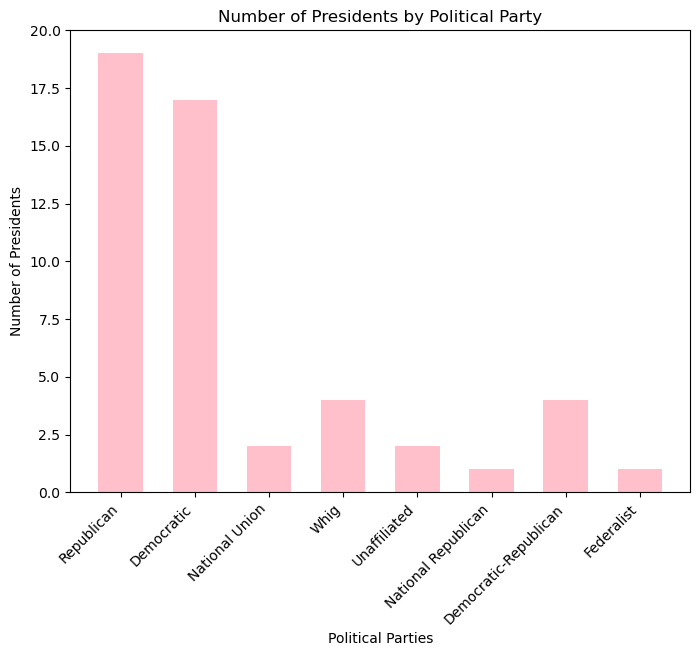

In [474]:
# Create lists for plotting
horizontal_axis = list(party_counts.keys())
vertical_axis = list(party_counts.values())

# Plotting the bar chart
plt.figure(figsize=(8, 6))

#creating breaks 
bar_width = 0.6
plt.bar(horizontal_axis,vertical_axis,width=bar_width,color='pink')

# Set y-axis limits
plt.ylim(0, max(counts) + 2)  # Set the upper limit above the highest bar

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45, ha='right')

plt.xlabel('Political Parties')
plt.ylabel('Number of Presidents')
plt.title('Number of Presidents by Political Party')
plt.show()